<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/11_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter a Social Media Scrape


## Authorizing a Twitter Account

First you'll need the [twitter package](https://pypi.org/project/twitter/)!  It is not automatically loaded into colab.  

In [1]:
!pip install twitter

     |████████████████████████████████| 50 kB 2.7 MB/s 


Next you'll need the authentication codes for a twitter api.  You can use your own twitter account and follow the directions [here](https://developer.twitter.com/en/docs/authentication/oauth-1-0a/api-key-and-secret).  

For class I have shared some authentication keys.  In order to keep these secret (GitHub won't let us post secrets to their website!) I have created a file called `config.py`.  I upload this into the environment (file structure) of colab and I reference it like a package.  This means only if you have this file can you get to it but I can share my code with everyone still.

In [2]:
import twitter
import config

CONSUMER_KEY = config.CONSUMER_KEY
CONSUMER_SECRET = config.CONSUMER_SECRET
OAUTH_TOKEN = config.OAUTH_TOKEN
OAUTH_TOKEN_SECRET = config.OAUTH_TOKEN_SECRET
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

mathcs_twitter_api = twitter.Twitter(auth=auth)

## Posting to Social Media

In [3]:
status = "Having fun in Data Processing and Vizualization class!  Posting to twitter has never been easier!"

mathcs_twitter_api.statuses.update(
    status=status)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Feb 01 18:20:49 +0000 2022',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1488578097469345794,
 'id_str': '1488578097469345794',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://ecok.edu/academics/colleges-and-schools/college-health-and-sciences/department-mathematics-and-computer" rel="nofollow">Starlas Data Project</a>',
 'text': 'Having fun in Data Processing and Vizualization class!  Posting to twitter has never been easier!',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Tue Sep 04 18:38:49 +0000 2018',
  'default_profile': False,
  'default_profil

The above shows the tweet was made to my account.  You can even go find it!  Think about how great you life could be if you automate all your interactions with socials too!

## What is the Twitterverse Discussing?

In [ ]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = nurfnick_twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = nurfnick_twitter_api.trends.place(_id=US_WOE_ID)

for i in range(10):
    print(world_trends[0]['trends'][i]['query'])

Rihanna
Bungie
Sony
%23PSGOGCN
Destiny
%23DebateCYLrtve
%23survivor2022allstar
Riri
Messi
Arsenal


In [ ]:
for i in range(3):
    print(us_trends[0]['trends'][i]['query'])

Rihanna
Bungie
Sony


Here is a nicer display of the data using `json` package.  JSON is anotherway to store data and is utilized in many no-sql databases.

In [ ]:
import json

print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "Rihanna",
    "url": "http://twitter.com/search?q=Rihanna",
    "promoted_content": null,
    "query": "Rihanna",
    "tweet_volume": 1011572
   },
   {
    "name": "Bungie",
    "url": "http://twitter.com/search?q=Bungie",
    "promoted_content": null,
    "query": "Bungie",
    "tweet_volume": 134417
   },
   {
    "name": "Sony",
    "url": "http://twitter.com/search?q=Sony",
    "promoted_content": null,
    "query": "Sony",
    "tweet_volume": 140544
   },
   {
    "name": "#PSGOGCN",
    "url": "http://twitter.com/search?q=%23PSGOGCN",
    "promoted_content": null,
    "query": "%23PSGOGCN",
    "tweet_volume": 16053
   },
   {
    "name": "Destiny",
    "url": "http://twitter.com/search?q=Destiny",
    "promoted_content": null,
    "query": "Destiny",
    "tweet_volume": 104446
   },
   {
    "name": "#DebateCYLrtve",
    "url": "http://twitter.com/search?q=%23DebateCYLrtve",
    "promoted_content": null,
    "query": "%23DebateCYLrtve",
    

### Computing the intersection of two sets of trends

In [ ]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Trudeau', 'Halo', 'Nazis', 'Drake', 'PlayStation', 'Auba', 'Whoopi', 'Rihanna', 'Arsenal', 'Riri', 'Sony', 'Destiny', 'Bungie', 'Happy Lunar New Year', 'Activision'}


## Search Results

In [ ]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json


#q = "#Ada"
q = '#ECUTigers'

count = 1000

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = mathcs_twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = mathcs_twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses, indent=4))


Length of statuses 2
Length of statuses 2
[
    {
        "created_at": "Wed Jan 26 19:23:50 +0000 2022",
        "id": 1486419627735281668,
        "id_str": "1486419627735281668",
        "text": "RT @ecoklibrary: The library is hiring student assistants right now! See open positions on Handshake: https://t.co/foDTl2we1L\n@ECUTigerUpda\u2026",
        "truncated": false,
        "entities": {
            "hashtags": [],
            "symbols": [],
            "user_mentions": [
                {
                    "screen_name": "ecoklibrary",
                    "name": "Linscheid Library",
                    "id": 1155847532607655938,
                    "id_str": "1155847532607655938",
                    "indices": [
                        3,
                        15
                    ]
                }
            ],
            "urls": [
                {
                    "url": "https://t.co/foDTl2we1L",
                    "expanded_url": "https://joinhandshake.com"

In [ ]:
json.dumps(statuses[1])

'{"created_at": "Wed Jan 26 18:03:11 +0000 2022", "id": 1486399334367252485, "id_str": "1486399334367252485", "text": "The library is hiring student assistants right now! See open positions on Handshake: https://t.co/foDTl2we1L\\u2026 https://t.co/6YMZaDtfmz", "truncated": true, "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [{"url": "https://t.co/foDTl2we1L", "expanded_url": "https://joinhandshake.com", "display_url": "joinhandshake.com", "indices": [85, 108]}, {"url": "https://t.co/6YMZaDtfmz", "expanded_url": "https://twitter.com/i/web/status/1486399334367252485", "display_url": "twitter.com/i/web/status/1\\u2026", "indices": [110, 133]}]}, "metadata": {"iso_language_code": "en", "result_type": "recent"}, "source": "<a href=\\"https://www.later.com\\" rel=\\"nofollow\\">LaterMedia</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id

### Extracting text, screen names, and hashtags from tweets

In [ ]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @ecoklibrary: The library is hiring student assistants right now! See open positions on Handshake: https://t.co/foDTl2we1L\n@ECUTigerUpda\u2026",
 "The library is hiring student assistants right now! See open positions on Handshake: https://t.co/foDTl2we1L\u2026 https://t.co/6YMZaDtfmz"
]
[
 "ecoklibrary"
]
[]
[
 "RT",
 "@ecoklibrary:",
 "The",
 "library",
 "is"
]


In [ ]:
update = ""

for i in range (0,len(status_texts)):
    update = update + status_texts[i]

In [ ]:
update

'RT @ecoklibrary: The library is hiring student assistants right now! See open positions on Handshake: https://t.co/foDTl2we1L\n@ECUTigerUpda…The library is hiring student assistants right now! See open positions on Handshake: https://t.co/foDTl2we1L… https://t.co/6YMZaDtfmz'

### Creating a basic frequency distribution from the words in tweets

In [ ]:
from collections import Counter



for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10


[('RT', 30), ('to', 22), ('is', 20), ('you', 19), ('this', 17), ('for', 15), ('the', 14), ('a', 13), ('t-shirt', 12), ('in', 11)]
[('ecu_oil', 11), ('ECUTigerUpdates', 9), ('ECUAlumni_Fndtn', 5), ('ECUTigersSB', 4), ('brimooreee', 3), ('Diegs_11', 3), ('BaldwinJalen', 2), ('celena0311', 1), ('cs_ecu', 1), ('ECUroar', 1)]
[('ECUTigers', 17), ('ecutigersfb', 9), ('hearourroar', 9), ('ECUTIGERS', 9), ('SeniorDay', 4), ('ECUTigersChickasawAppreciationDay', 3), ('Jbal', 2), ('corner', 2), ('ProudTigerMom', 2), ('aintnomountainhighenough', 2)]


In [ ]:
words

['RT',
 '@ECUTigerUpdates:',
 'Take',
 'time',
 'to',
 'check',
 'out',
 'the',
 'new',
 'Digital',
 'Humanities',
 'Lab',
 'in',
 'the',
 'Linscheid',
 'Library.',
 'The',
 'open',
 'house',
 'is',
 'today',
 'from',
 '3-4:30pm…',
 'We',
 'hope',
 'you’re',
 'enjoying',
 'our',
 '“Meet',
 'the',
 'Employees”',
 'video',
 'series!',
 'This',
 'is',
 'Ada',
 'native',
 'Chance',
 'Branscum,',
 'our',
 'Senior',
 'Vice…',
 'https://t.co/MMQ4kgfLD7',
 'RT',
 '@ECUTigerUpdates:',
 'Take',
 'time',
 'to',
 'check',
 'out',
 'the',
 'new',
 'Digital',
 'Humanities',
 'Lab',
 'in',
 'the',
 'Linscheid',
 'Library.',
 'The',
 'open',
 'house',
 'is',
 'today',
 'from',
 '3-4:30pm…',
 'Take',
 'time',
 'to',
 'check',
 'out',
 'the',
 'new',
 'Digital',
 'Humanities',
 'Lab',
 'in',
 'the',
 'Linscheid',
 'Library.',
 'The',
 'open',
 'house',
 'is',
 'today',
 'from',
 '3-4:30…',
 'https://t.co/DWiQrJW57F',
 'Your',
 'Voice',
 'is',
 'Needed:',
 'Please',
 'take',
 'our',
 'library',
 'use',
 

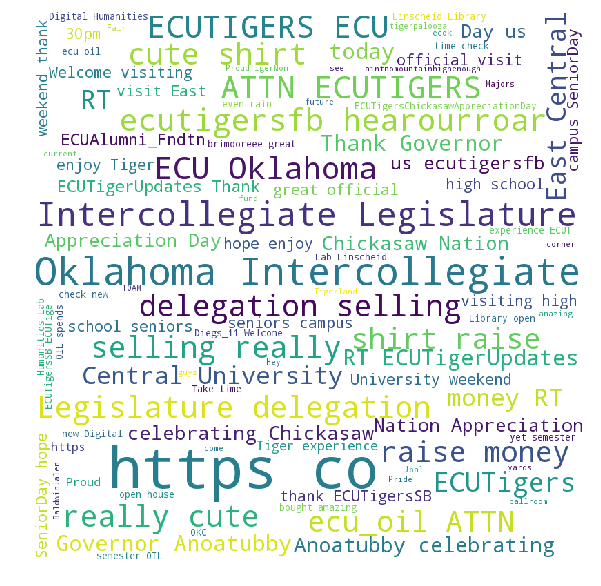

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pa


stupid= ["hi",'bye']
columns=["word"]
pa.DataFrame(stupid,  columns = columns)


stopwords = set(STOPWORDS)




wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(update)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

#plt.show()
plt.savefig('img.png')

In [ ]:
from PIL import Image

im = Image.open('img.png')

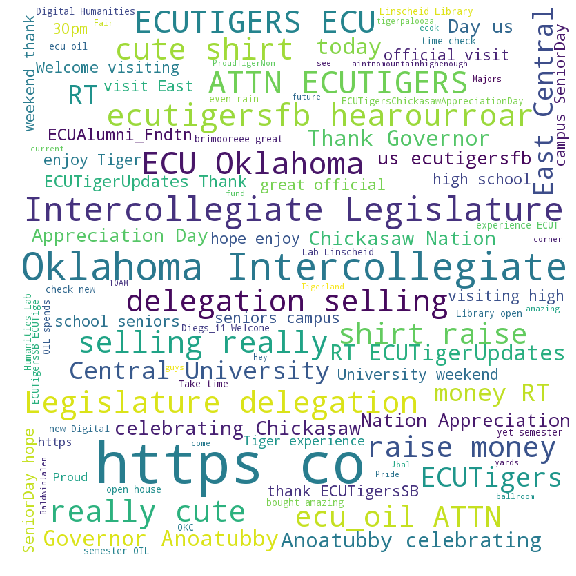

In [ ]:
im

### Using Prettytable

In [ ]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------+-------+
| Word    | Count |
+---------+-------+
| RT      |    30 |
| to      |    22 |
| is      |    20 |
| you     |    19 |
| this    |    17 |
| for     |    15 |
| the     |    14 |
| a       |    13 |
| t-shirt |    12 |
| in      |    11 |
+---------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| ecu_oil         |    11 |
| ECUTigerUpdates |     9 |
| ECUAlumni_Fndtn |     5 |
| ECUTigersSB     |     4 |
| brimooreee      |     3 |
| Diegs_11        |     3 |
| BaldwinJalen    |     2 |
| celena0311      |     1 |
| cs_ecu          |     1 |
| ECUroar         |     1 |
+-----------------+-------+
+-----------------------------------+-------+
| Hashtag                           | Count |
+-----------------------------------+-------+
| ECUTigers                         |    17 |
| ecutigersfb                       |     9 |
| hearourroar                       |     9 |
| ECUTIGERS                         |     9 |
| Seni

### Calculating Lexical Diversity

In [ ]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.2688296639629201
0.2682926829268293
0.19047619047619047
19.177777777777777


### Finding the most popular retweets

In [ ]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+----------------------------------------------------+
| Count | Screen Name | Text                                               |
+-------+-------------+----------------------------------------------------+
| 10    | ecu_oil     | RT @ecu_oil: ATTN #ECUTIGERS!                      |
|       |             |                                                    |
|       |             | Our ECU Oklahoma Intercollegiate Legislature       |
|       |             | delegation is selling this really cute t-shirt to  |
|       |             | raise money f…                                     |
| 10    | ecu_oil     | RT @ecu_oil: ATTN #ECUTIGERS!                      |
|       |             |                                                    |
|       |             | Our ECU Oklahoma Intercollegiate Legislature       |
|       |             | delegation is selling this really cute t-shirt to  |
|       |             | raise money f…                                     |

### Plotting frequencies of words

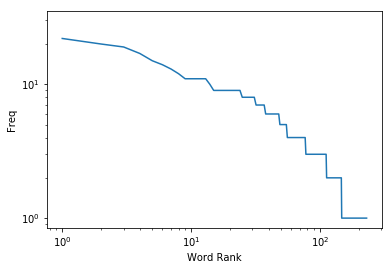

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

### Posting It Back on the Web

In [ ]:
import datetime
now = datetime.datetime.now()

print(now)

2022-01-31 22:06:50.050192


In [ ]:
popular = c.most_common()[0][0]

now = datetime.date(now.year,now.month,now.day)

print(now)

2018-10-16


In [ ]:
mathcs_twitter_api.statuses.update(
    status="#ECUTigers are talking about {} today on {} @cs_ecu".format(popular,now))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 21:21:00 +0000 2018',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'ECUTigers'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1037047347405045760,
    'id_str': '1037047347405045760',
    'indices': [59, 66],
    'name': 'ECU_Math/CS',
    'screen_name': 'cs_ecu'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1052308450976378880,
 'id_str': '1052308450976378880',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://ecok.edu/academics/colleges-and-schools/college-health-and-sciences/department-mathematics-and-computer" rel="nofollow">Starlas Data Project</a>',
 'text': '#ECUTigers are talking about ECUTigers today on 2018-10-16 @cs_ec

In [ ]:
mathcs_twitter_api.statuses.update(
    status="#ECUTigers are talking about {} today on {} @cs_ecu".format(popular,now))

SyntaxError: invalid syntax (<ipython-input-73-4f32b376ab6a>, line 1)

In [ ]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]


In [ ]:
retweets[1]

('ECUTigerUpdates',
 'RT @ECUTigerUpdates: Take time to check out the new Digital Humanities Lab in the Linscheid Library. The open house is today from 3-4:30pm…')

In [ ]:
mathcs_twitter_api.statuses.update(
    status="#ECUTigers are saying `{}` today on {} @cs_ecu".format(retweets[1],now))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 21:29:54 +0000 2018',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'ECUTigers'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1052310693339439104',
    'indices': [116, 139],
    'url': 'https://t.co/Pp9R3Z0hMr'}],
  'user_mentions': [{'id': 44617318,
    'id_str': '44617318',
    'indices': [47, 63],
    'name': 'East Central Univ.',
    'screen_name': 'ECUTigerUpdates'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1052310693339439104,
 'id_str': '1052310693339439104',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://ecok.edu/academics/colleges-and-schools/c

## Getting Home Pages and Past Tweets

We can grab the home timeline from our user.

In [6]:
len(mathcs_twitter_api.statuses.home_timeline())

20

Or another user

In [8]:
len(mathcs_twitter_api.statuses.user_timeline(screen_name="nurfnick"))

20

I am going to guess here that the API is limiting me to only the past 20 tweets.  You'll find that there are lots of limits in the API!

## Your Turn

Using either the math_cs credentials or your own;

1. Get authenticated to twitter.
2. Find the top trending 10 topics in the world and display them by name
3. Search for your favorite show, actor, sports team or player and see what twitter is saying about them.